<a href="https://colab.research.google.com/github/AvinashIkigai/Art-of-Doing/blob/main/Algorithmic_Trading_Strategy_Using_MACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL (1).csv


In [3]:
df = pd.read_csv('AAPL.csv')
df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,179.500000,182.000000,178.475006,181.074997,167.128174,4269006.0
1,2019-01-02,180.274994,180.949997,173.774994,175.149994,161.659531,7056976.0
2,2019-01-03,175.149994,176.225006,173.475006,174.975006,161.498016,4795824.0
3,2019-01-04,175.125000,176.949997,173.774994,176.574997,162.974777,3675758.0
4,2019-01-07,176.750000,179.024994,175.550003,178.550003,164.797653,3408486.0
...,...,...,...,...,...,...,...
460,2020-11-12,93.750000,94.000000,92.599998,93.050003,93.050003,13703238.0
461,2020-11-13,92.949997,93.300003,91.500000,92.800003,92.800003,10482732.0
462,2020-11-17,94.300003,95.300003,93.050003,93.550003,93.550003,12227481.0
463,2020-11-18,93.699997,94.650002,92.800003,93.949997,93.949997,10207427.0


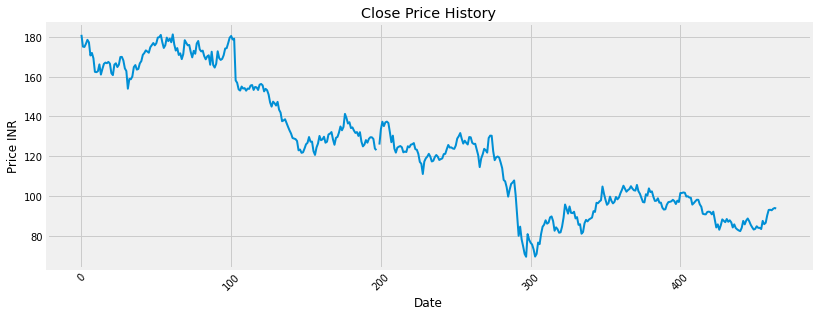

In [4]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'],label='Close',linewidth=2)
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price INR')
# plt.legend(loc='upper right')
plt.show()

In [5]:
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9,adjust=False).mean()

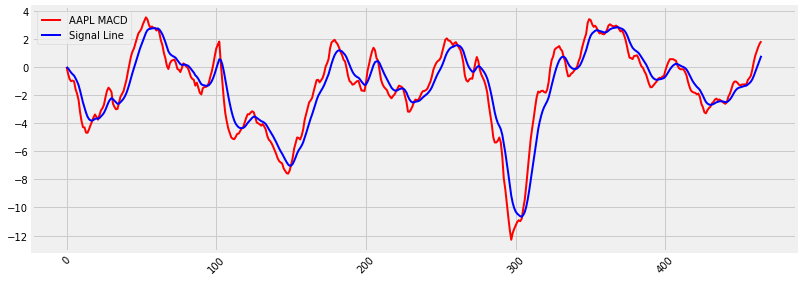

In [6]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index,MACD,label='AAPL MACD',linewidth=2,color = 'red')
plt.plot(df.index,signal,label='Signal Line',linewidth=2,color = 'blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [7]:
df['MACD'] = MACD
df['Signal Line'] = signal
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
0,2019-01-01,179.500000,182.000000,178.475006,181.074997,167.128174,4269006.0,0.000000,0.000000
1,2019-01-02,180.274994,180.949997,173.774994,175.149994,161.659531,7056976.0,-0.472650,-0.094530
2,2019-01-03,175.149994,176.225006,173.475006,174.975006,161.498016,4795824.0,-0.851532,-0.245930
3,2019-01-04,175.125000,176.949997,173.774994,176.574997,162.974777,3675758.0,-1.011039,-0.398952
4,2019-01-07,176.750000,179.024994,175.550003,178.550003,164.797653,3408486.0,-0.966936,-0.512549
...,...,...,...,...,...,...,...,...,...
460,2020-11-12,93.750000,94.000000,92.599998,93.050003,93.050003,13703238.0,0.815774,-0.340473
461,2020-11-13,92.949997,93.300003,91.500000,92.800003,92.800003,10482732.0,1.134699,-0.045438
462,2020-11-17,94.300003,95.300003,93.050003,93.550003,93.550003,12227481.0,1.431468,0.249943
463,2020-11-18,93.699997,94.650002,92.800003,93.949997,93.949997,10207427.0,1.679574,0.535869


In [8]:
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Close'][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
        Buy.append(np.nan)
        Sell.append(np.nan)
  return(Buy, Sell)
  

In [9]:
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]


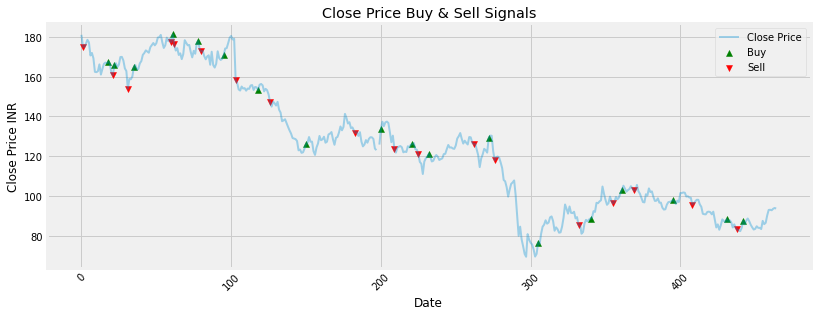

In [16]:
plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index, df['Buy_Signal_Price'],label = 'Buy', marker= '^', color = 'green', alpha=1)
plt.scatter(df.index, df['Sell_Signal_Price'],label = 'Sell', marker= 'v', color = 'red', alpha=1)
plt.plot(df['Close'],label='Close Price',alpha=0.35,linewidth=2)
plt.title('Close Price Buy & Sell Signals')
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Close Price INR')
plt.legend(loc='upper right')
plt.show()